In [1]:
import pandas as pd
import os
os.chdir("..")

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

From https://paddle.stanford.edu/

Protein regions having 5 or more consecutive tiles with score greater than 6 are annotated as high-strength predicted ADs and regions with score greater than 4 are annotated as medium-strength predicted ADs.

Plan: Consider >= 5 tiles with score greater than 4 as a predicted AD.

In [4]:
preds = pd.read_csv("../output/yeast_TFs_preds/PADDLE_noSS_yeast_TFs.csv", index_col = 0)[["id", "paddle_noSS_pred"]]
preds

,id,paddle_noSS_pred
0,sp|O14467|MBF1_YEAST Multiprotein-bridging fac...,-0.043939
1,sp|O14467|MBF1_YEAST Multiprotein-bridging fac...,-0.091048
2,sp|O14467|MBF1_YEAST Multiprotein-bridging fac...,-0.108901
3,sp|O14467|MBF1_YEAST Multiprotein-bridging fac...,-0.154330
4,sp|O14467|MBF1_YEAST Multiprotein-bridging fac...,-0.205383
...,...,...
135694,sp|Q9HG13|MATA2_KLULA Mating-type protein A2 O...,-0.209127
135695,sp|Q9HG13|MATA2_KLULA Mating-type protein A2 O...,-0.119144
135696,sp|Q9HG13|MATA2_KLULA Mating-type protein A2 O...,0.053190
135697,sp|Q9HG13|MATA2_KLULA Mating-type protein A2 O...,0.151122


/global/software/rocky-8.x86_64/manual/modules/langs/anaconda3/2024.02-1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='paddle_noSS_pred', ylabel='Count'>

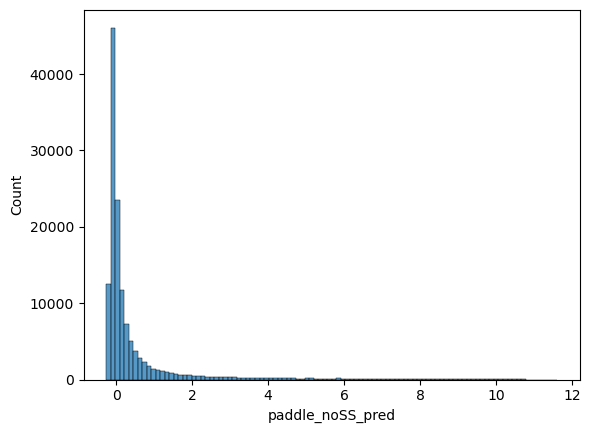

In [5]:
sns.histplot(preds["paddle_noSS_pred"], bins = 100)

In [6]:
grouped_preds = pd.DataFrame(preds.groupby("id")["paddle_noSS_pred"].apply(list)).reset_index()
grouped_preds

,id,paddle_noSS_pred
0,sp|O14467|MBF1_YEAST Multiprotein-bridging fac...,"[-0.043939114, -0.09104848, -0.108901024, -0.1..."
1,sp|O93958|MATA2_YARLL Mating-type protein A2 O...,"[0.9984524, 2.3991952, 2.41995, 1.4466673, 0.9..."
2,sp|P03069|GCN4_YEAST General control transcrip...,"[2.0681558, 1.9322586, 1.9206917, 1.0752803, 0..."
3,sp|P04386|GAL4_YEAST Regulatory protein GAL4 O...,"[-0.11096883, -0.10072994, -0.099725485, -0.10..."
4,sp|P04387|GAL80_YEAST Galactose/lactose metabo...,"[-0.07498264, -0.09696078, -0.11746621, -0.131..."
...,...,...
242,sp|Q707Y3|MATA1_YARLL Mating-type protein A1 O...,"[0.12610912, 0.26388645, 0.3066721, 0.31140327..."
243,sp|Q707Y6|MATA1_PICAN Mating-type protein A1 O...,"[0.38761282, 0.39867496, 0.38165283, 0.3408470..."
244,sp|Q708A1|MATA1_NAKDE Mating-type protein A1 O...,"[0.39249587, 0.4160111, 0.2463572, 0.30808735,..."
245,sp|Q9HG12|MATA1_KLULA Mating-type protein A1 O...,"[1.5948479, 1.6278303, 1.3936045, 1.0810281, 1..."


In [7]:
centers = []
for i in grouped_preds.index:
    centers.append(np.arange(53/2, len(grouped_preds["paddle_noSS_pred"].iloc[i]) + 53/2))
grouped_preds["centers"] = centers
grouped_preds

,id,paddle_noSS_pred,centers
0,sp|O14467|MBF1_YEAST Multiprotein-bridging fac...,"[-0.043939114, -0.09104848, -0.108901024, -0.1...","[26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5, 33...."
1,sp|O93958|MATA2_YARLL Mating-type protein A2 O...,"[0.9984524, 2.3991952, 2.41995, 1.4466673, 0.9...","[26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5, 33...."
2,sp|P03069|GCN4_YEAST General control transcrip...,"[2.0681558, 1.9322586, 1.9206917, 1.0752803, 0...","[26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5, 33...."
3,sp|P04386|GAL4_YEAST Regulatory protein GAL4 O...,"[-0.11096883, -0.10072994, -0.099725485, -0.10...","[26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5, 33...."
4,sp|P04387|GAL80_YEAST Galactose/lactose metabo...,"[-0.07498264, -0.09696078, -0.11746621, -0.131...","[26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5, 33...."
...,...,...,...
242,sp|Q707Y3|MATA1_YARLL Mating-type protein A1 O...,"[0.12610912, 0.26388645, 0.3066721, 0.31140327...","[26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5, 33...."
243,sp|Q707Y6|MATA1_PICAN Mating-type protein A1 O...,"[0.38761282, 0.39867496, 0.38165283, 0.3408470...","[26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5, 33...."
244,sp|Q708A1|MATA1_NAKDE Mating-type protein A1 O...,"[0.39249587, 0.4160111, 0.2463572, 0.30808735,...","[26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5, 33...."
245,sp|Q9HG12|MATA1_KLULA Mating-type protein A1 O...,"[1.5948479, 1.6278303, 1.3936045, 1.0810281, 1...","[26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5, 33...."


In [8]:
preds_expanded = grouped_preds.explode(['paddle_noSS_pred', 'centers']).reset_index()
preds_expanded

,index,id,paddle_noSS_pred,centers
0,0,sp|O14467|MBF1_YEAST Multiprotein-bridging fac...,-0.043939,26.5
1,0,sp|O14467|MBF1_YEAST Multiprotein-bridging fac...,-0.091048,27.5
2,0,sp|O14467|MBF1_YEAST Multiprotein-bridging fac...,-0.108901,28.5
3,0,sp|O14467|MBF1_YEAST Multiprotein-bridging fac...,-0.15433,29.5
4,0,sp|O14467|MBF1_YEAST Multiprotein-bridging fac...,-0.205383,30.5
...,...,...,...,...
135694,246,sp|Q9HG13|MATA2_KLULA Mating-type protein A2 O...,-0.209127,226.5
135695,246,sp|Q9HG13|MATA2_KLULA Mating-type protein A2 O...,-0.119144,227.5
135696,246,sp|Q9HG13|MATA2_KLULA Mating-type protein A2 O...,0.05319,228.5
135697,246,sp|Q9HG13|MATA2_KLULA Mating-type protein A2 O...,0.151122,229.5


In [13]:
preds_expanded["start"] = preds_expanded["centers"] - 53/2
preds_expanded["end"] = preds_expanded["centers"] + 53/2
preds_expanded

,index,id,paddle_noSS_pred,centers,start,end,active
0,0,sp|O14467|MBF1_YEAST Multiprotein-bridging fac...,-0.043939,26.5,0.0,53.0,False
1,0,sp|O14467|MBF1_YEAST Multiprotein-bridging fac...,-0.091048,27.5,1.0,54.0,False
2,0,sp|O14467|MBF1_YEAST Multiprotein-bridging fac...,-0.108901,28.5,2.0,55.0,False
3,0,sp|O14467|MBF1_YEAST Multiprotein-bridging fac...,-0.15433,29.5,3.0,56.0,False
4,0,sp|O14467|MBF1_YEAST Multiprotein-bridging fac...,-0.205383,30.5,4.0,57.0,False
...,...,...,...,...,...,...,...
135694,246,sp|Q9HG13|MATA2_KLULA Mating-type protein A2 O...,-0.209127,226.5,200.0,253.0,False
135695,246,sp|Q9HG13|MATA2_KLULA Mating-type protein A2 O...,-0.119144,227.5,201.0,254.0,False
135696,246,sp|Q9HG13|MATA2_KLULA Mating-type protein A2 O...,0.05319,228.5,202.0,255.0,False
135697,246,sp|Q9HG13|MATA2_KLULA Mating-type protein A2 O...,0.151122,229.5,203.0,256.0,False


In [14]:
preds_expanded["active"] = preds_expanded["paddle_noSS_pred"] > 4
preds_expanded

,index,id,paddle_noSS_pred,centers,start,end,active
0,0,sp|O14467|MBF1_YEAST Multiprotein-bridging fac...,-0.043939,26.5,0.0,53.0,False
1,0,sp|O14467|MBF1_YEAST Multiprotein-bridging fac...,-0.091048,27.5,1.0,54.0,False
2,0,sp|O14467|MBF1_YEAST Multiprotein-bridging fac...,-0.108901,28.5,2.0,55.0,False
3,0,sp|O14467|MBF1_YEAST Multiprotein-bridging fac...,-0.15433,29.5,3.0,56.0,False
4,0,sp|O14467|MBF1_YEAST Multiprotein-bridging fac...,-0.205383,30.5,4.0,57.0,False
...,...,...,...,...,...,...,...
135694,246,sp|Q9HG13|MATA2_KLULA Mating-type protein A2 O...,-0.209127,226.5,200.0,253.0,False
135695,246,sp|Q9HG13|MATA2_KLULA Mating-type protein A2 O...,-0.119144,227.5,201.0,254.0,False
135696,246,sp|Q9HG13|MATA2_KLULA Mating-type protein A2 O...,0.05319,228.5,202.0,255.0,False
135697,246,sp|Q9HG13|MATA2_KLULA Mating-type protein A2 O...,0.151122,229.5,203.0,256.0,False


In [30]:
def true_intervals_longer_than_5(bool_list):
    intervals = []
    start = None

    for i, val in enumerate(bool_list):
        if val:
            if start is None:
                start = i
        else:
            if start is not None:
                if i - start >= 5:
                    intervals.append((start + 26 - 1, i + 26 - 1))
                start = None

    # Catch any interval that goes to the end
    if start is not None and len(bool_list) - start >= 5:
        intervals.append((start + 26 - 1, len(bool_list) + 26 - 1)) 

    return intervals


In [31]:
true_intervals_longer_than_5([True, False, False, False, True, True, True, True, True, False])

[(29, 34)]

In [32]:
active_lists = pd.DataFrame(preds_expanded.groupby("id")["active"].agg(list)).reset_index()
active_lists["intervals"] = active_lists["active"].apply(lambda lst: true_intervals_longer_than_5(lst))
active_lists

,id,active,intervals
0,sp|O14467|MBF1_YEAST Multiprotein-bridging fac...,"[False, False, False, False, False, False, Fal...",[]
1,sp|O93958|MATA2_YARLL Mating-type protein A2 O...,"[False, False, False, False, False, False, Fal...","[(223, 262)]"
2,sp|P03069|GCN4_YEAST General control transcrip...,"[False, False, False, False, False, False, Fal...","[(69, 135)]"
3,sp|P04386|GAL4_YEAST Regulatory protein GAL4 O...,"[False, False, False, False, False, False, Fal...","[(149, 154), (155, 180), (837, 854)]"
4,sp|P04387|GAL80_YEAST Galactose/lactose metabo...,"[False, False, False, False, False, False, Fal...",[]
...,...,...,...
242,sp|Q707Y3|MATA1_YARLL Mating-type protein A1 O...,"[False, False, False, False, False, False, Fal...",[]
243,sp|Q707Y6|MATA1_PICAN Mating-type protein A1 O...,"[False, False, False, False, False, False, Fal...",[]
244,sp|Q708A1|MATA1_NAKDE Mating-type protein A1 O...,"[False, False, False, False, False, False, Fal...",[]
245,sp|Q9HG12|MATA1_KLULA Mating-type protein A1 O...,"[False, False, False, False, False, False, Fal...",[]


In [33]:
active_lists["num_intervals"] = [len(_) for _ in active_lists["intervals"]]
active_lists

,id,active,intervals,num_intervals
0,sp|O14467|MBF1_YEAST Multiprotein-bridging fac...,"[False, False, False, False, False, False, Fal...",[],0
1,sp|O93958|MATA2_YARLL Mating-type protein A2 O...,"[False, False, False, False, False, False, Fal...","[(223, 262)]",1
2,sp|P03069|GCN4_YEAST General control transcrip...,"[False, False, False, False, False, False, Fal...","[(69, 135)]",1
3,sp|P04386|GAL4_YEAST Regulatory protein GAL4 O...,"[False, False, False, False, False, False, Fal...","[(149, 154), (155, 180), (837, 854)]",3
4,sp|P04387|GAL80_YEAST Galactose/lactose metabo...,"[False, False, False, False, False, False, Fal...",[],0
...,...,...,...,...
242,sp|Q707Y3|MATA1_YARLL Mating-type protein A1 O...,"[False, False, False, False, False, False, Fal...",[],0
243,sp|Q707Y6|MATA1_PICAN Mating-type protein A1 O...,"[False, False, False, False, False, False, Fal...",[],0
244,sp|Q708A1|MATA1_NAKDE Mating-type protein A1 O...,"[False, False, False, False, False, False, Fal...",[],0
245,sp|Q9HG12|MATA1_KLULA Mating-type protein A1 O...,"[False, False, False, False, False, False, Fal...",[],0


In [34]:
final_preds = active_lists[active_lists["num_intervals"] > 0]
final_preds

,id,active,intervals,num_intervals
1,sp|O93958|MATA2_YARLL Mating-type protein A2 O...,"[False, False, False, False, False, False, Fal...","[(223, 262)]",1
2,sp|P03069|GCN4_YEAST General control transcrip...,"[False, False, False, False, False, False, Fal...","[(69, 135)]",1
3,sp|P04386|GAL4_YEAST Regulatory protein GAL4 O...,"[False, False, False, False, False, False, Fal...","[(149, 154), (155, 180), (837, 854)]",3
5,sp|P05085|ARGR2_YEAST Arginine metabolism regu...,"[False, False, False, False, False, False, Fal...","[(86, 105), (202, 249)]",2
9,sp|P07248|ADR1_YEAST Regulatory protein ADR1 O...,"[False, False, False, False, False, False, Fal...","[(256, 306), (338, 356), (358, 364), (406, 453...",7
...,...,...,...,...
233,sp|Q12244|YL054_YEAST Uncharacterized transcri...,"[False, False, False, False, False, False, Fal...","[(775, 816)]",1
235,sp|Q12340|YRM1_YEAST Zinc finger transcription...,"[False, False, False, False, False, False, Fal...","[(194, 231), (698, 710), (743, 759)]",3
236,sp|Q12363|WTM1_YEAST Transcriptional modulator...,"[False, False, False, False, False, False, Fal...","[(64, 76), (77, 86), (317, 339), (340, 350)]",4
239,sp|Q12457|NSI1_YEAST RNA polymerase I terminat...,"[False, False, False, False, False, False, Fal...","[(143, 175)]",1


In [35]:
final_preds["uniprotID"] = final_preds["id"].str.split("|").str[1]
final_preds[["uniprotID", "intervals"]]

/tmp/ipykernel_3649656/388756709.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_preds["uniprotID"] = final_preds["id"].str.split("|").str[1]


,uniprotID,intervals
1,O93958,"[(223, 262)]"
2,P03069,"[(69, 135)]"
3,P04386,"[(149, 154), (155, 180), (837, 854)]"
5,P05085,"[(86, 105), (202, 249)]"
9,P07248,"[(256, 306), (338, 356), (358, 364), (406, 453..."
...,...,...
233,Q12244,"[(775, 816)]"
235,Q12340,"[(194, 231), (698, 710), (743, 759)]"
236,Q12363,"[(64, 76), (77, 86), (317, 339), (340, 350)]"
239,Q12457,"[(143, 175)]"


In [36]:
final_preds_expanded = final_preds[["uniprotID", "intervals"]].explode("intervals")
final_preds_expanded["Start"] = [_[0] for _ in final_preds_expanded["intervals"]]
final_preds_expanded["End"] = [_[1] for _ in final_preds_expanded["intervals"]]
final_preds_expanded

,uniprotID,intervals,Start,End
1,O93958,"(223, 262)",223,262
2,P03069,"(69, 135)",69,135
3,P04386,"(149, 154)",149,154
3,P04386,"(155, 180)",155,180
3,P04386,"(837, 854)",837,854
...,...,...,...,...
236,Q12363,"(317, 339)",317,339
236,Q12363,"(340, 350)",340,350
239,Q12457,"(143, 175)",143,175
241,Q12753,"(284, 317)",284,317


In [37]:
final_preds_expanded[["uniprotID", "Start", "End"]].to_csv("../output/yeast_TFs_preds/cleaned/paddle_noSS.csv")

In [38]:
# Zero indexed intervals
# [include, exclude)
final_preds_expanded[["uniprotID", "Start", "End"]]

,uniprotID,Start,End
1,O93958,223,262
2,P03069,69,135
3,P04386,149,154
3,P04386,155,180
3,P04386,837,854
...,...,...,...
236,Q12363,317,339
236,Q12363,340,350
239,Q12457,143,175
241,Q12753,284,317
